<a href="https://colab.research.google.com/github/Junying123/food-vision-pytorch/blob/main/Food_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.Importing PyTorch and setting up device-agnostic code

In [ ]:
!nvidia-smi

Fri Mar 29 14:12:55 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.86                 Driver Version: 551.86         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1050      WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   46C    P8             N/A / ERR!  |     234MiB /   4096MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
torch.__version__

'2.1.2'

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 1.Get data

In [ ]:
import requests
import zipfile
from pathlib import Path
import os

# setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# download pizza, steak and sushi
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/Junying123/branching/raw/main/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data...")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

# remove zip file
os.remove(data_path / "pizza_steak_sushi.zip")

data\pizza_steak_sushi directory exists.
Unzipping pizza, steak and sushi data...


'ls' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


# 2.Data preparation

In [ ]:
import os
# print the all the images in pizza, steak and sushi folder
for dirpath, dirnames, filenames in os.walk(image_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


- Around 70-80 images are used to train the model.
- Another 10-15 images are used to evaluate the model.

In [ ]:
"""
pizza_steak_sushi/
    train/
        pizza/
            image01.jpeg
            image02.jpeg
            ...
        steak/
            image04.jpeg
            image05.jpeg
            ...
        sushi/
            image07.jpeg
            ...
    test/
        pizza/
            image101.jpeg
            image102.jpeg
            ...
        steak/
            image104.jpeg
            image105.jpeg
            ...
        sushi/
            image107.jpeg
            image108.jpeg
            ...
"""
# set up path
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

## 2.1 Visualize an image

- Use pathlib.Path.glob() to retrieve all image paths ending in .jpg
- Select a random image path using Python's random.choice()
- Obtain the image class name using pathlib.Path.parent.stem
- Open the random image path using PIL.Image.open() to work with the image
- Display the image and print some metadata

In [ ]:
import random
from PIL import Image
from pathlib import Path

# set random seed
random.seed(42)

# set path to data located in the current directory
base_dir = Path('data/pizza_steak_sushi')

jpg_paths = list(base_dir.glob("*/*/*.jpg"))
jpeg_paths = list(base_dir.glob("*/*/*.jpeg"))
image_paths = jpg_paths + jpeg_paths
image_paths[:5]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg')]

In [ ]:
# random image path
random_image_path = random.choice(image_paths)
random_image_path

WindowsPath('data/pizza_steak_sushi/test/sushi/2394442.jpg')

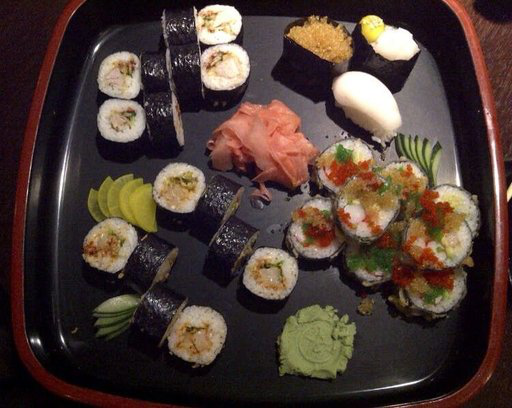

In [ ]:
# open image
image = Image.open(random_image_path)
image

Image path: data\pizza_steak_sushi\test\pizza\2508636.jpg
Image mode: RGB
Image size: (512, 512)
Image class: pizza


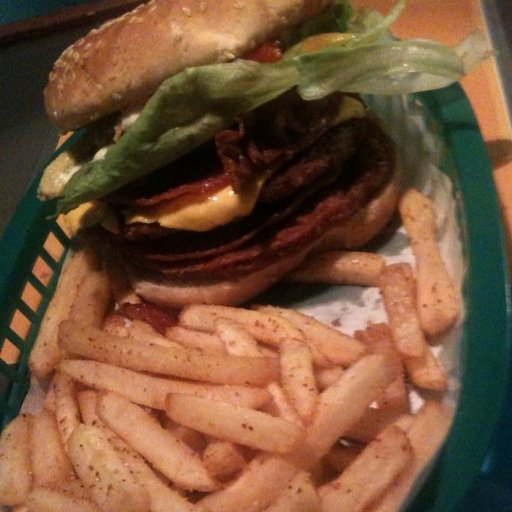



Image path: data\pizza_steak_sushi\train\pizza\5764.jpg
Image mode: RGB
Image size: (512, 384)
Image class: pizza


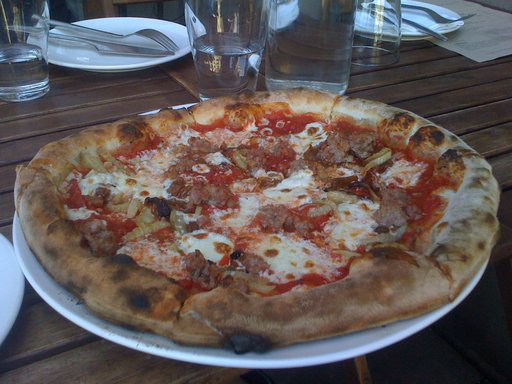



Image path: data\pizza_steak_sushi\train\pizza\3109486.jpg
Image mode: RGB
Image size: (512, 512)
Image class: pizza


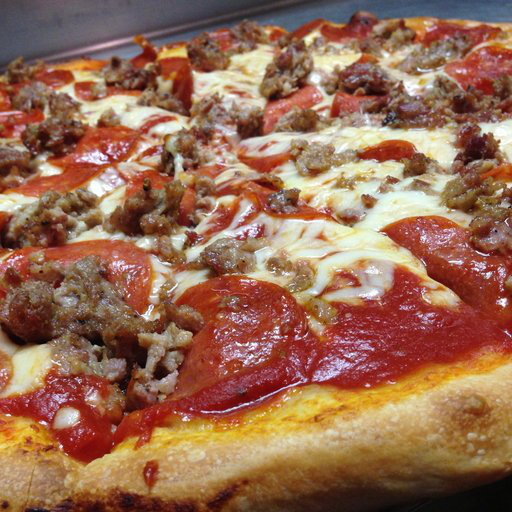

In [ ]:
# function of visualising 3 random images from path
def visualise_random_images(image_paths):
  for i in range(3):
    random_image_path = random.choice(image_paths)
    image_class = random_image_path.parent.stem
    image = Image.open(random_image_path)
    print(f"Image path: {random_image_path}")
    print(f"Image mode: {image.mode}")
    print(f"Image size: {image.size}")
    print(f"Image class: {image_class}")
    display(image)
    print("\n")

# visualise random images
visualise_random_images(image_paths)

# 3.Transforming data

- Convert the images into tensors, which are numerical representations.
- Then create a torch.utils.data.Dataset and a torch.utils.data.DataLoader, which we will refer to as Dataset and DataLoader.

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## 3.1 Transforming data with torchvision.transforms

- transform images into tensors
- torchvision.transforms has various built-in methods for formatting images, converting them into tensors, and manipulating them for data augmentation purposes.
- Resize the images to 64x64 using transforms.Resize()
- Apply random horizontal flipping using transforms.RandomHorizontalFlip() for data augmentation
- Convert the images from PIL format to PyTorch tensor using transforms.ToTensor()

In [ ]:
# image transforms
data_transform = transforms.Compose([
    # resize image
    transforms.Resize(size=(64, 64)),
    # flip image
    transforms.RandomHorizontalFlip(p=0.5),
    # convert image to tensor
    transforms.ToTensor()
])

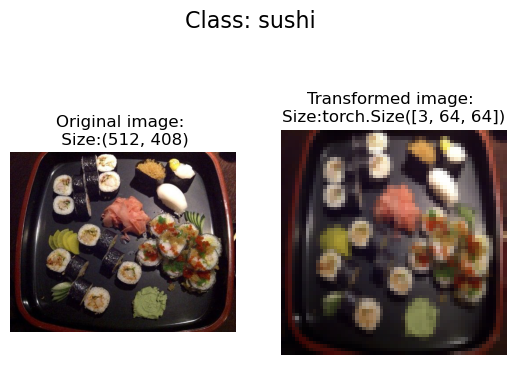

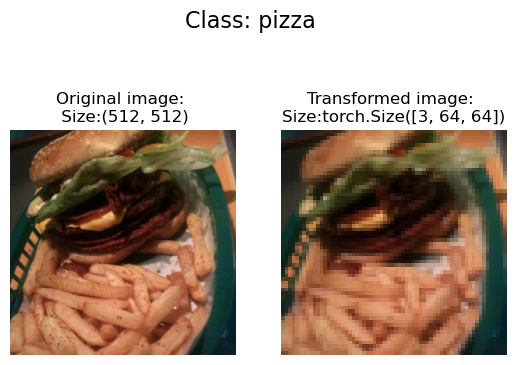

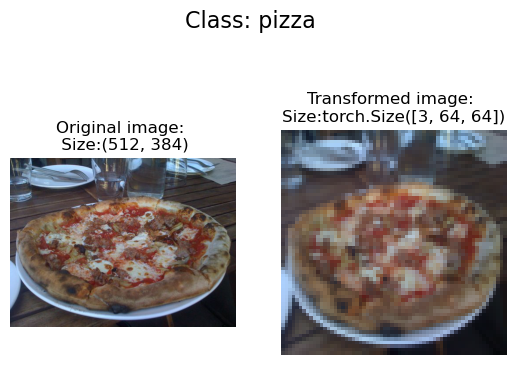

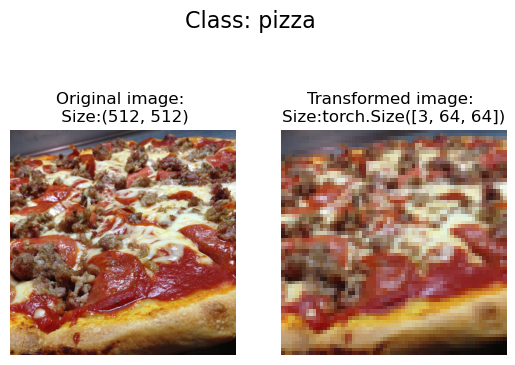

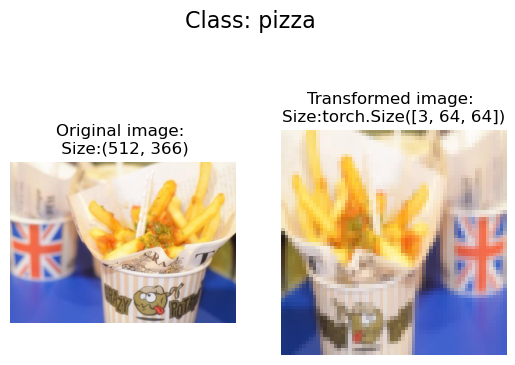

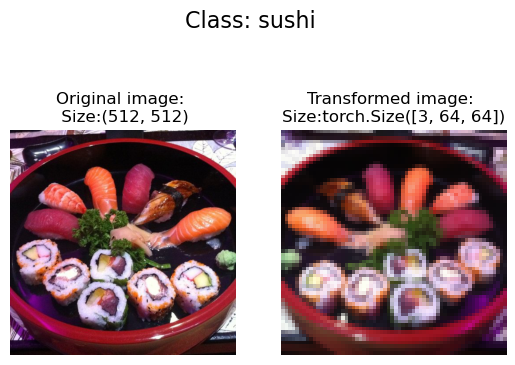

In [ ]:
# plot transformed image
import matplotlib.pyplot as plt

def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """
    plot some random transformed images from image_paths
    open n random images from image_paths, transform them
    and plot them in a nxn grid

    Args:
      image_paths: list of image paths
      transform: torchvision transforms
      n: number of images to plot

  """
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n*2)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      # plot original images
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original image: \n Size:{f.size}")
      ax[0].axis("off")

      # plot transformed images
      transformed_image = transform(f)
      # permute image tensor from CxHxW to HxWxC
      ax[1].imshow(transformed_image.permute(1, 2, 0))
      ax[1].axis("off")
      ax[1].set_title(f"Transformed image: \nSize:{transformed_image.shape}")
      ax
      ax[1].axis("off")
      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_paths,
                        transform=data_transform,
                        n=3)

# 4.Loading Image Data Using ImageFolder

- use the class torchvision.datasets.ImageFolder
- Pass the file path of a target image directory and the desired image transforms to perform on the images.
- pass data_transforms as an argument to the ImageFolder constructor

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
# class names
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# get class to idx mapping
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

Original shape: torch.Size([3, 64, 64])
Image permute shape: torch.Size([64, 64, 3])


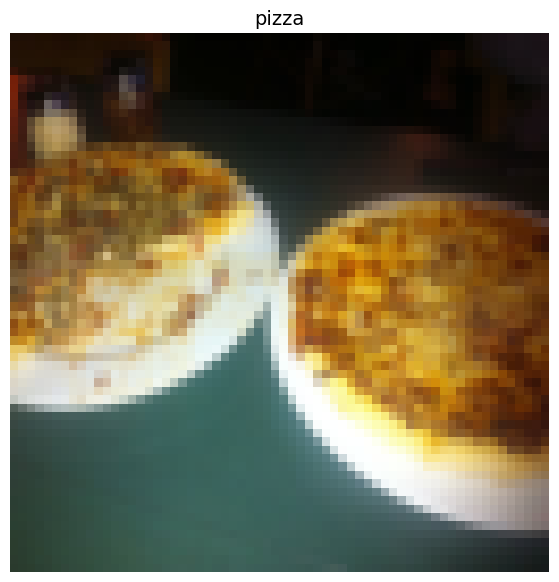

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape}")
print(f"Image permute shape: {img_permute.shape}")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

# 4.1 Turn loaded images into DataLoader's

In [ ]:
# turn train and test sets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32, # how many samples per batch?
                              num_workers=2, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             num_workers=2,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1956ccd0e50>,
 <torch.utils.data.dataloader.DataLoader at 0x1956ccd0640>)

In [ ]:
# Get a batch of training data
img, label = next(iter(train_dataloader))


print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


# 5.Option 1: Loading Image Data with a Custom Dataset

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
#
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## 5.1 Creating a helper function to get class names

- Utilize os.scandir() to traverse the target directory and obtain the class names, assuming the directory adheres to the standard image classification format.
- If the class names cannot be found, raise an error to indicate a potential issue with the directory structure.
- Transform the class names into a dictionary containing numerical labels for each class.

In [ ]:
# set path for target folder
target_path = train_dir
print(f"Target path: {target_path}")
# get the class names
class_names = os.listdir(target_path)
print(f"Class names: {class_names}")

Target path: data\pizza_steak_sushi\train
Class names: ['pizza', 'steak', 'sushi']


In [ ]:
# function to find classes from target path
def find_classes(target_path):
  """
    Finds the class folders in a target directory

    Args:
      target_path: target directory path to find class folders

    Returns:
      tuple of (classes, class_to_idx)

  """
  classes = [d.name for d in os.scandir(target_path) if d.is_dir()]
  classes.sort()
  class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
  return classes, class_to_idx


# find the class names
class_names, class_to_idx = find_classes(target_path)
print(f"Class names: {class_names}")
print(f"Class to index: {class_to_idx}")

Class names: ['pizza', 'steak', 'sushi']
Class to index: {'pizza': 0, 'steak': 1, 'sushi': 2}


## 5.2 Create a custom Dataset to replicate ImageFolder

- Create a subclass of torch.utils.data.Dataset with target_path and transform parameters.
- Define attributes for paths, transform, classes, and class_to_idx.
- Implement a function to load images from file and return them using PIL or torchvision.io.
- Override the __len__ method to return the number of samples in the dataset.
- Override the __getitem__ method to return a single sample from the dataset.

In [ ]:
# write a custom dataset class
class ImageFolderDataset(Dataset):
  """
    Custom dataset class

    Args:
      target_path: target directory path to find class folders
      transform: torchvision transforms

      returns:
        tuple of (image_path, class_idx)
  """
  def __init__(self, target_path: str, transform=None) -> None:
    #Define attributes for paths, transform, classes, and class_to_idx
    self.image_paths = list(pathlib.Path(target_path).glob("*/*"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(target_path)

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, index: int):
    image_path = self.image_paths[index]
    class_name = image_path.parent.stem
    class_idx = self.class_to_idx[class_name]
    image = Image.open(image_path)

    if self.transform:
      return self.transform(image), class_idx

    else:
      return image, class_idx


In [ ]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderDataset(target_path=train_dir, transform=train_transforms)
test_data_custom = ImageFolderDataset(target_path=test_dir, transform=test_transforms)

print(f"Train data:\n{train_data_custom}\nTest data:\n{test_data_custom}")

Train data:
Test data:


In [ ]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
test_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
print((len(train_data_custom) == len(train_data)) and (len(test_data_custom) == len(test_data)))
print((train_data_custom.class_to_idx == train_data.class_to_idx) and (test_data_custom.class_to_idx == test_data.class_to_idx))
print((train_data_custom.classes == train_data.classes) and (test_data_custom.classes == test_data.classes))

True
True
True


## 5.3 Display custom random images

Testing on train data with custom transformed images
Testing on test data with custom transformed images


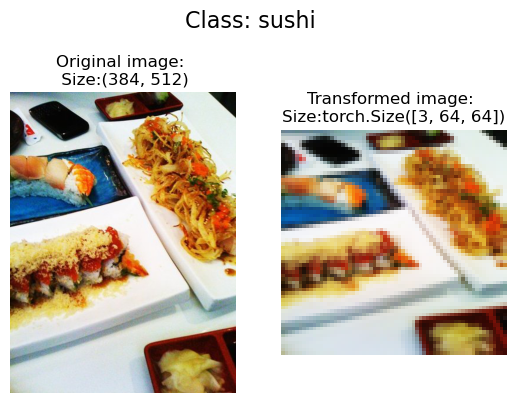

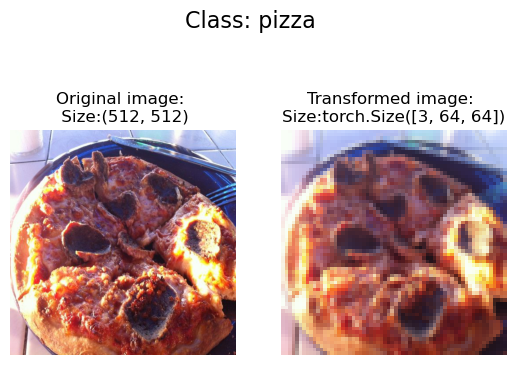

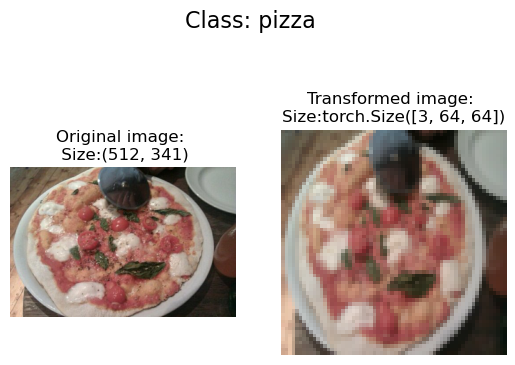

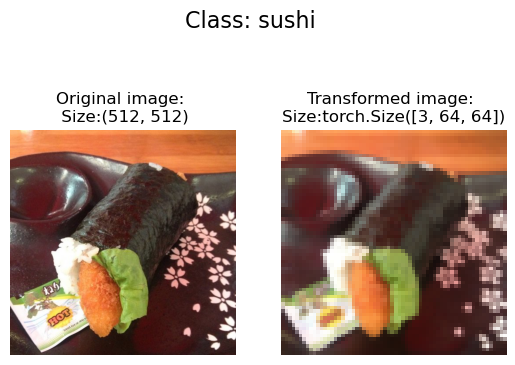

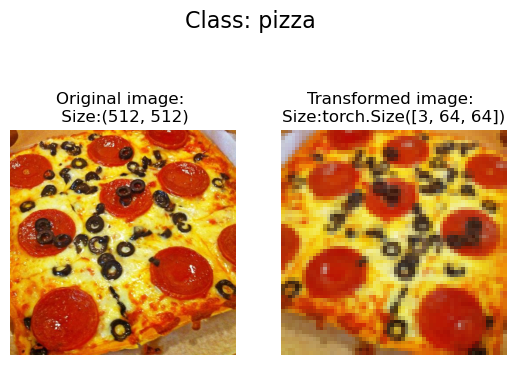

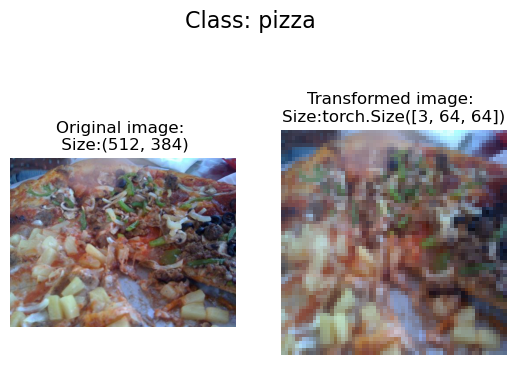

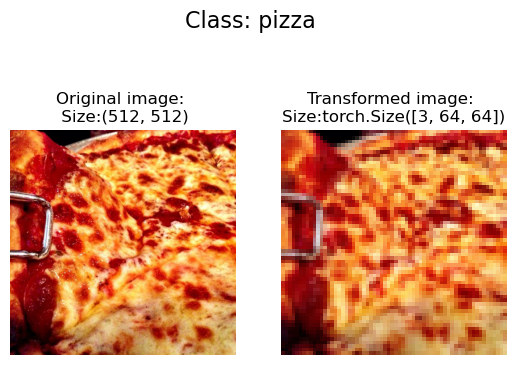

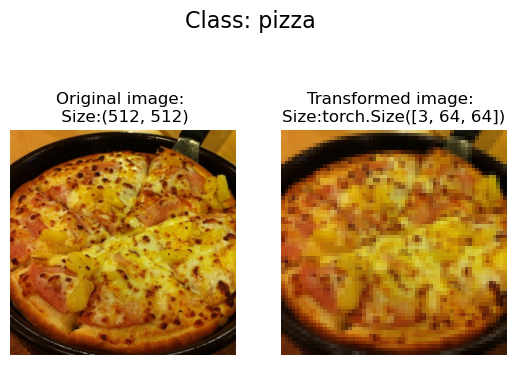

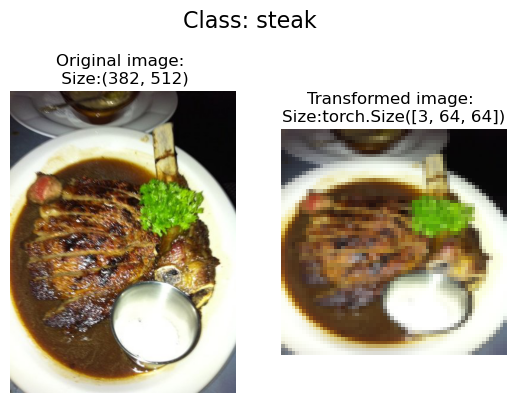

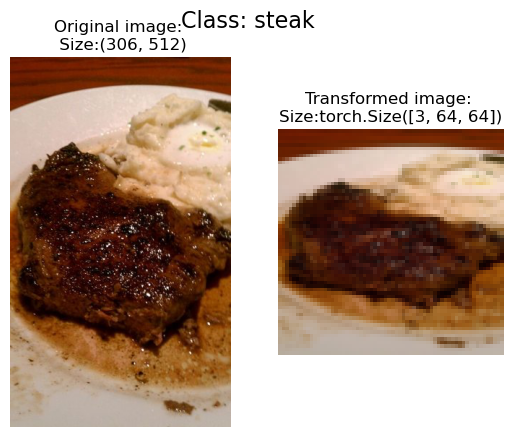

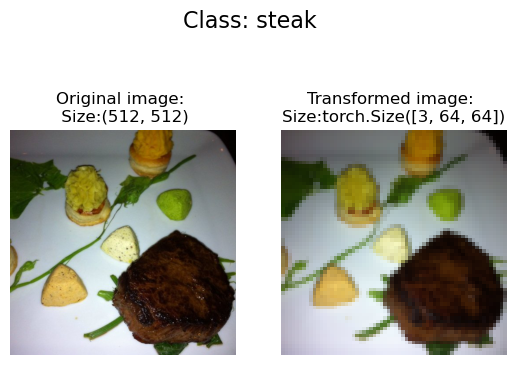

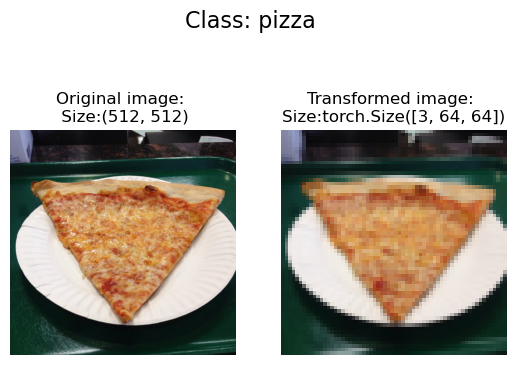

In [ ]:
# plot trained transformed custom images
print("Testing on train data with custom transformed images")
plot_transformed_images(image_paths=train_data_custom.image_paths,
                        transform=train_transforms,
                        n=3)
#plot tested transformed custom images
print("Testing on test data with custom transformed images")
plot_transformed_images(image_paths=test_data_custom.image_paths,
                        transform=test_transforms,
                        n=3)

## 5.4 Turn custom loaded images into DataLoader's

In [ ]:
# turn train and test sets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                              batch_size=1,
                              num_workers=0,
                              shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                             batch_size=1,
                             num_workers=0,
                             shuffle=False)

test_dataloader_custom, train_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x1956cb2c160>,
 <torch.utils.data.dataloader.DataLoader at 0x1956deadd60>)

In [ ]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


# 6.Other data augmentation

- Transforms alter images, such as turning them into tensors, cropping, erasing, or rotating them
- Data augmentation artificially increases the diversity of the training set
- Training a model on this altered dataset aims to improve its generalization
- torchvision.transforms offers various examples of data augmentation
- Random transforms like transforms.RandAugment() and transforms.TrivialAugmentWide() perform better than hand-picked transforms
- TrivialAugment randomly selects a number of transforms to apply to an image at a random magnitude within a given range

In [ ]:
from torchvision import transforms

# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

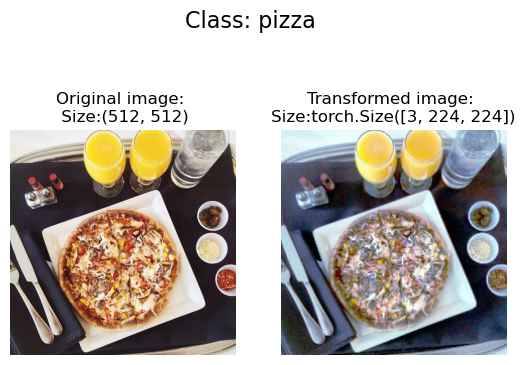

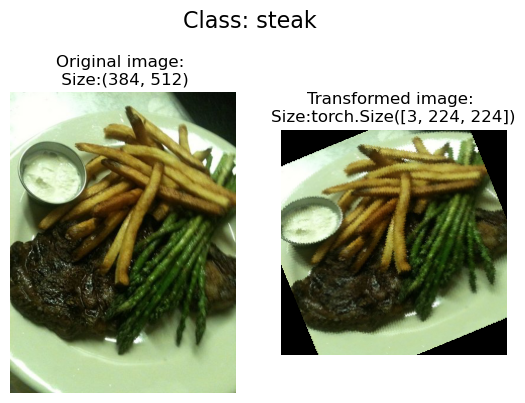

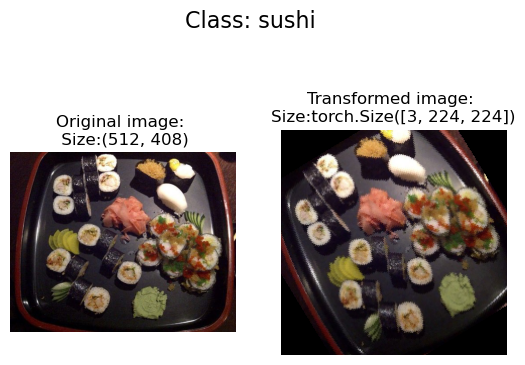

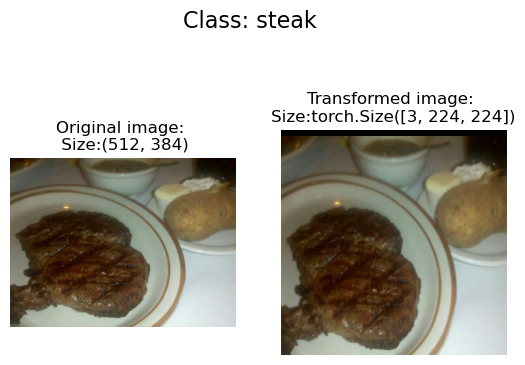

In [ ]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=2,
    seed=None
)

# 7.Model 0: TinyVGG without data augmentation



## 7.1 Creating transforms and loading data for Model 0

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [ ]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

import os
from torch.utils.data import DataLoader


#setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x1956d79e9d0>,
 <torch.utils.data.dataloader.DataLoader at 0x1956acb4070>)

## 7.2 Create TinyVGG model class

TinyVGG model from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/)

in_channels = 3 (RGB)

In [ ]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
train_data.classes

['pizza', 'steak', 'sushi']

In [ ]:
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

## 7.3 Try a forward pass on a single image (to test the model)

- Retrieve a batch of images and labels from the DataLoader
- Extract a single image from the batch and use unsqueeze() to adjust its shape to have a batch size of 1, in order to fit the model
- Perform inference on the single image, ensuring it is sent to the target device
- Print the process and convert the model's raw output logits to prediction probabilities using torch.softmax() for multi-class data
- Convert the prediction probabilities to prediction labels with torch.argmax()

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0429, -0.0198, -0.0153]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3469, 0.3258, 0.3273]], device='cuda:0')

Output prediction label:
tensor([0], device='cuda:0')

Actual label:
1


## 7.4 Use torchinfo to get an idea of the shapes going through our model

torchinfo provides a summary() function which accepts a PyTorch model and an input_shape as input, and then displays the flow of a tensor through the model.

In [ ]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## 7.5 Create train & test loop functions

- train_step() -
accepts a model, a DataLoader, a loss function, and an optimizer as input, and then proceeds to train the model using the DataLoader.

- test_step() -
accepts a model, a DataLoader, and a loss function as input, and then proceeds to evaluate the model using the DataLoader.

- train() -
combines steps 1 and 2 to perform training and evaluation for a specified number of epochs, and returns a results dictionary.


In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

## 7.6 Creating a train() function to combine train_step() and test_step()

- Receive a model, a training and test DataLoader, an optimizer, a loss function, and the number of epochs for training and testing.
- Initialize an empty results dictionary to store train_loss, train_acc, test_loss, and test_acc values.
- Iterate through the training and testing steps for the specified number of epochs.
- Print the progress at the end of each epoch.
- Update the results dictionary with the latest metrics after each epoch.

In [ ]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

## 7.7 Train and Evaluate Model 0

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Create an instance of the model
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# end the timer
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1360 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0847 | train_acc: 0.4258 | test_loss: 1.1620 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1157 | train_acc: 0.2930 | test_loss: 1.1697 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0956 | train_acc: 0.4141 | test_loss: 1.1385 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0985 | train_acc: 0.2930 | test_loss: 1.1428 | test_acc: 0.1979
Total training time: 111.270 seconds


 Not a good results for this model.

## 7.8 Plot the loss curves of Model 0

In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
import matplotlib.pyplot as plt
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the values from the results dictionary and move them to CPU if necessary
    loss = results['train_loss']
    test_loss = results['test_loss']
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Convert tensors to numpy arrays if not already in numpy array form
    if isinstance(loss, torch.Tensor):
        loss = loss.cpu().detach().numpy()
    if isinstance(test_loss, torch.Tensor):
        test_loss = test_loss.cpu().detach().numpy()
    if isinstance(accuracy, torch.Tensor):
        accuracy = accuracy.cpu().detach().numpy()
    if isinstance(test_accuracy, torch.Tensor):
        test_accuracy = test_accuracy.cpu().detach().numpy()

    # Figure out how many epochs there were
    epochs = range(len(loss))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

    plt.show() # Display the plot

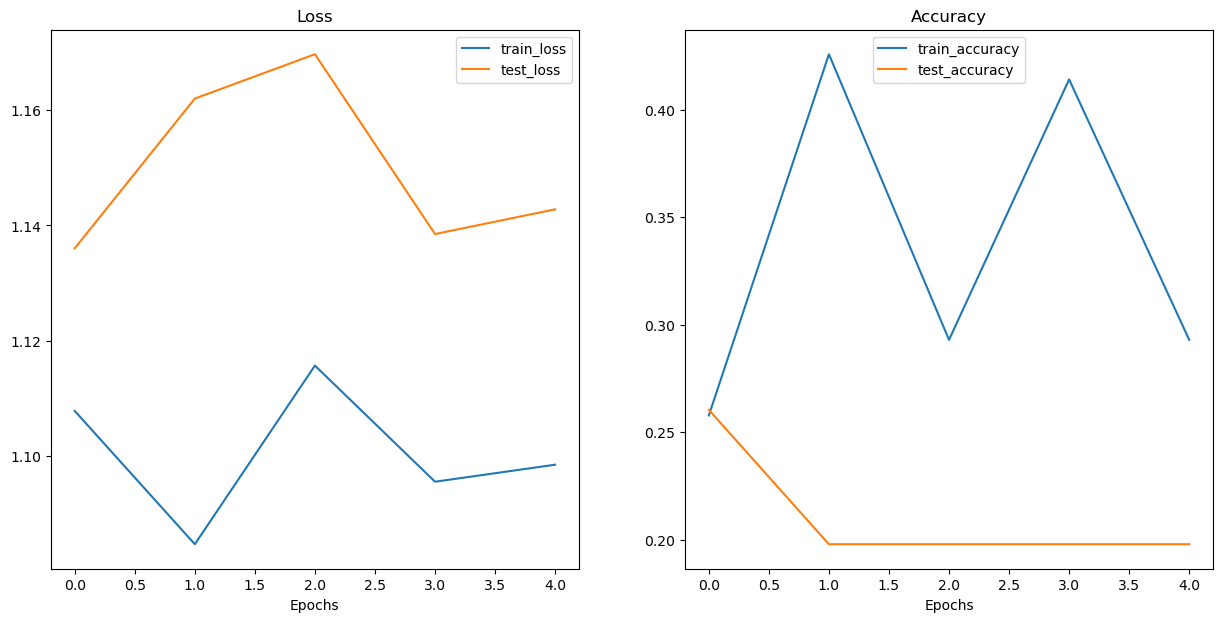

In [ ]:
plot_loss_curves(model_0_results)

# 8. Ideal Loss curves

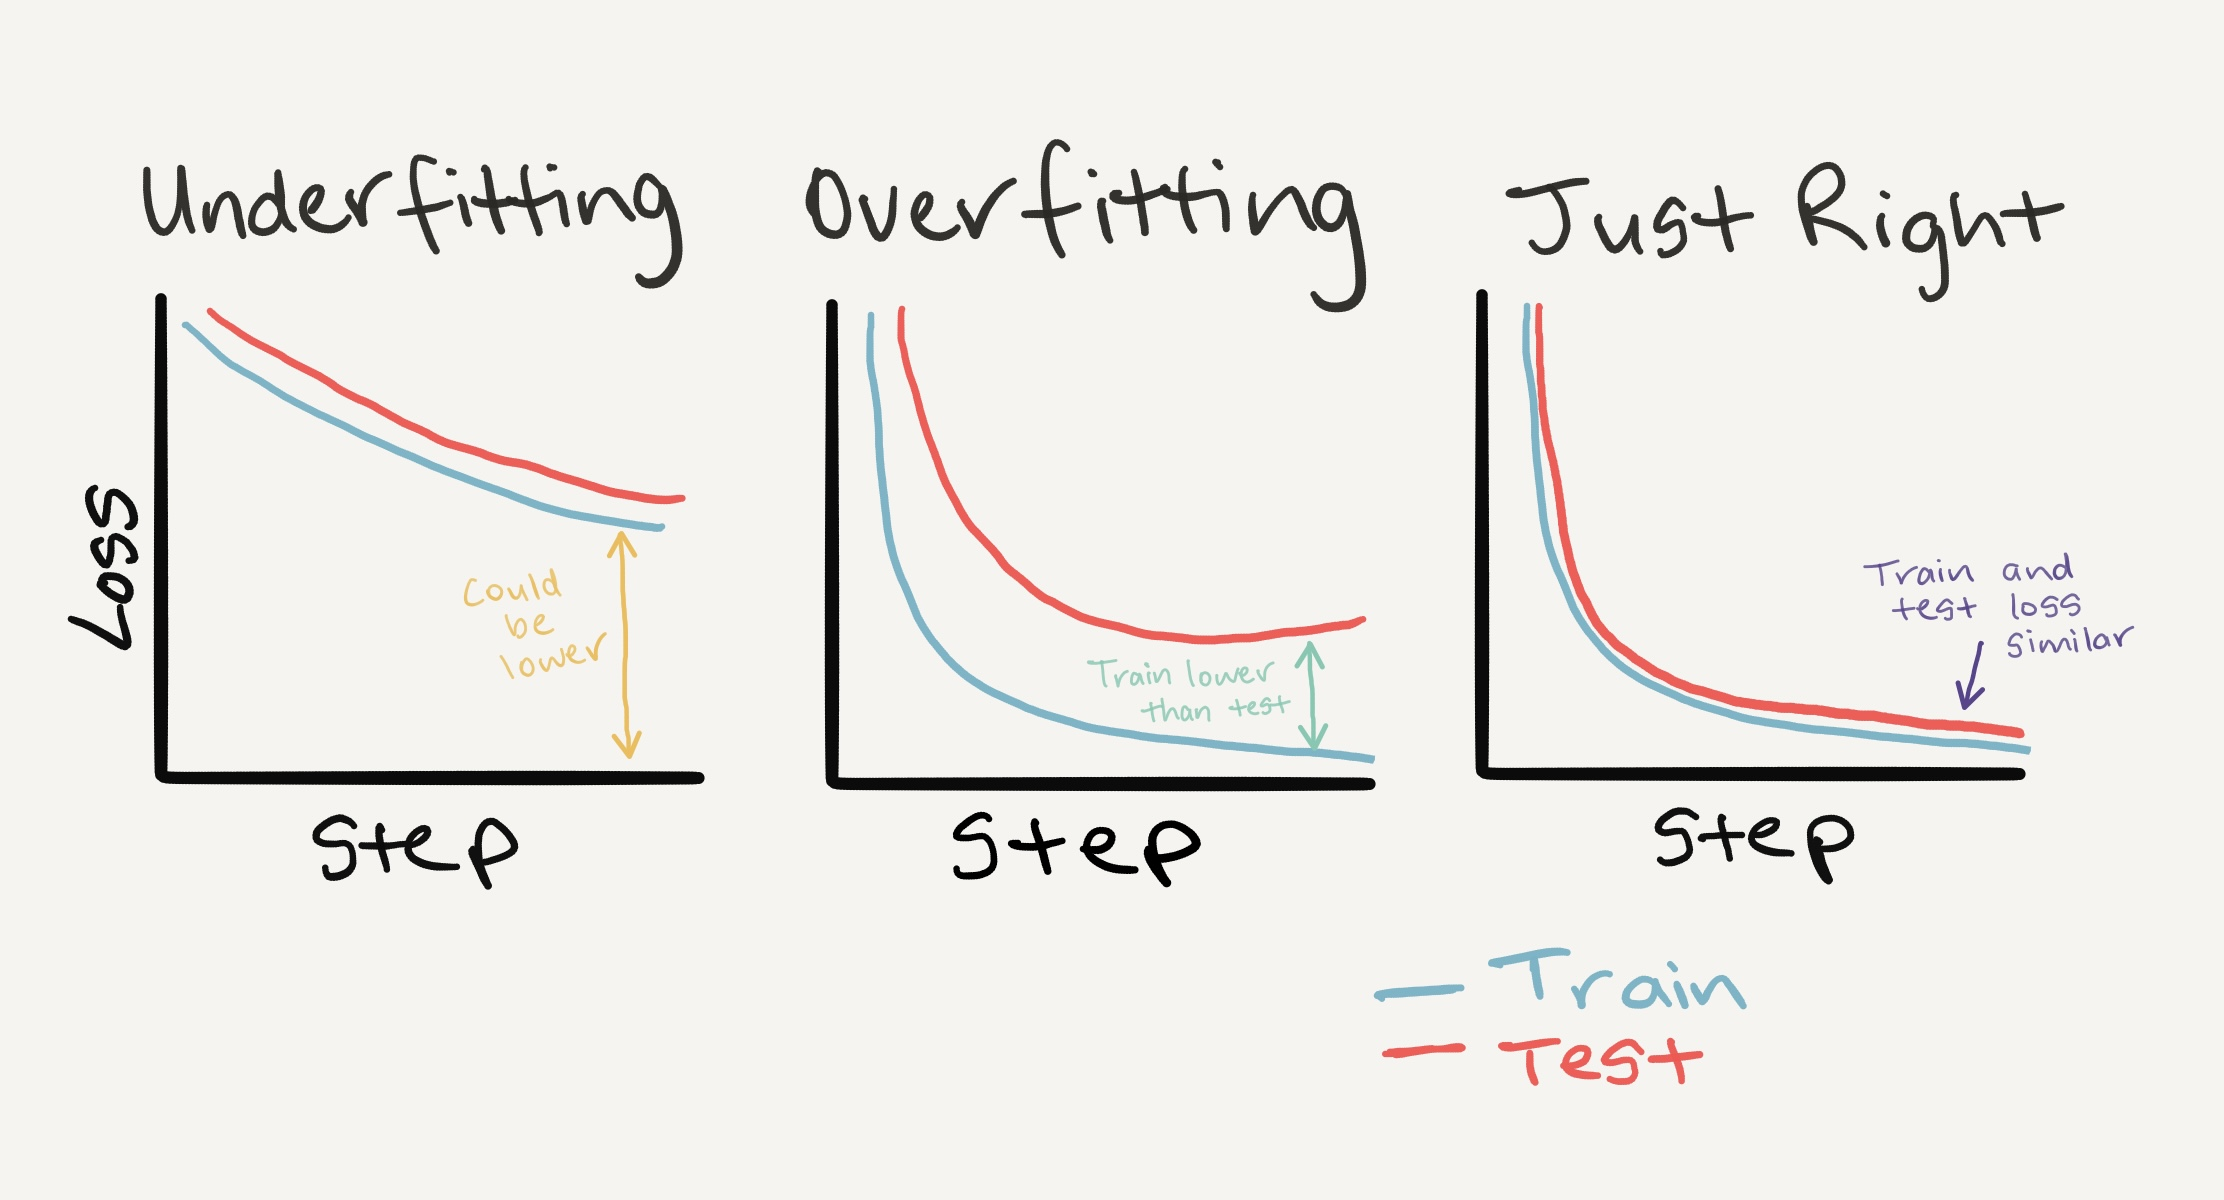

## 8.1 Deal with overfitting


- **Increase the amount of data**: Having a larger dataset allows the model to learn more generalizable patterns that can be applied to new examples.

- **Simplify the model**: If the current model is overfitting, it might be too complex. Simplifying the model can be done by reducing the number of layers or hidden units.

- **Apply data augmentation**: By manipulating the training data to add more variety, it becomes harder for the model to learn specific patterns, leading to better generalization.

- **Utilize transfer learning**: Transfer learning involves using patterns learned by a pre-trained model as a foundation for a new task, such as using a computer vision model pre-trained on various images and adjusting it for food images.

- **Incorporate dropout layers**: Randomly removing connections between hidden layers in neural networks simplifies the model while improving the remaining connections.

- **Implement learning rate decay**: Gradually reducing the learning rate during training is similar to taking smaller steps as you get closer to your target, helping the model converge more effectively.

- **Use early stopping**: Stopping model training before overfitting occurs, such as when the loss has stopped decreasing for a certain number of epochs, can prevent overfitting and retain the model weights with the lowest loss.

# 9.Model 1: TinyVGG with Data Augmentation

In [ ]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

## 9.1 Create train and test Dataset's and DataLoader's

In [ ]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
#Dataset -> DataLoader
train_dataloader_trivial_augment = DataLoader(train_data_augmented, batch_size=32, shuffle=True, num_workers=2 )
test_dataloader_simple = DataLoader(test_data_simple, batch_size=32, shuffle=False, num_workers=2)

train_dataloader_trivial_augment, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x1956d4c52e0>,
 <torch.utils.data.dataloader.DataLoader at 0x1956d2e1be0>)

## 9.2 Construct and train Model 1

In [ ]:
# create model_1 with augmented data
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_trivial_augment,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2500 | test_loss: 1.1060 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0792 | train_acc: 0.4258 | test_loss: 1.1384 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0810 | train_acc: 0.4258 | test_loss: 1.1691 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1291 | train_acc: 0.3047 | test_loss: 1.1623 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0901 | train_acc: 0.4258 | test_loss: 1.1477 | test_acc: 0.2604
Total training time: 46.939 seconds


## 9.4 Plot the loss curves of Model 1

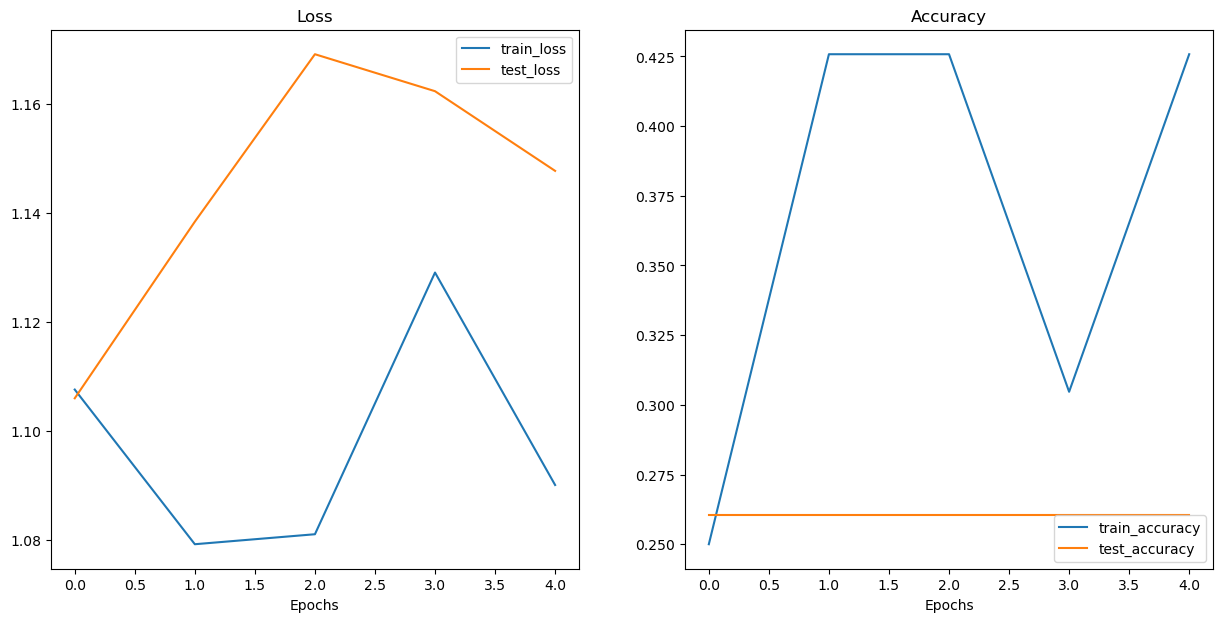

In [ ]:
plot_loss_curves(model_1_results)

# 10.Compare model results

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df, model_1_df

(   train_loss  train_acc  test_loss  test_acc
 0    1.107833   0.257812   1.136041  0.260417
 1    1.084713   0.425781   1.162013  0.197917
 2    1.115700   0.292969   1.169708  0.197917
 3    1.095555   0.414062   1.138518  0.197917
 4    1.098505   0.292969   1.142803  0.197917,
    train_loss  train_acc  test_loss  test_acc
 0    1.107573   0.250000   1.105973  0.260417
 1    1.079185   0.425781   1.138388  0.260417
 2    1.081017   0.425781   1.169126  0.260417
 3    1.129052   0.304688   1.162340  0.260417
 4    1.090057   0.425781   1.147715  0.260417)

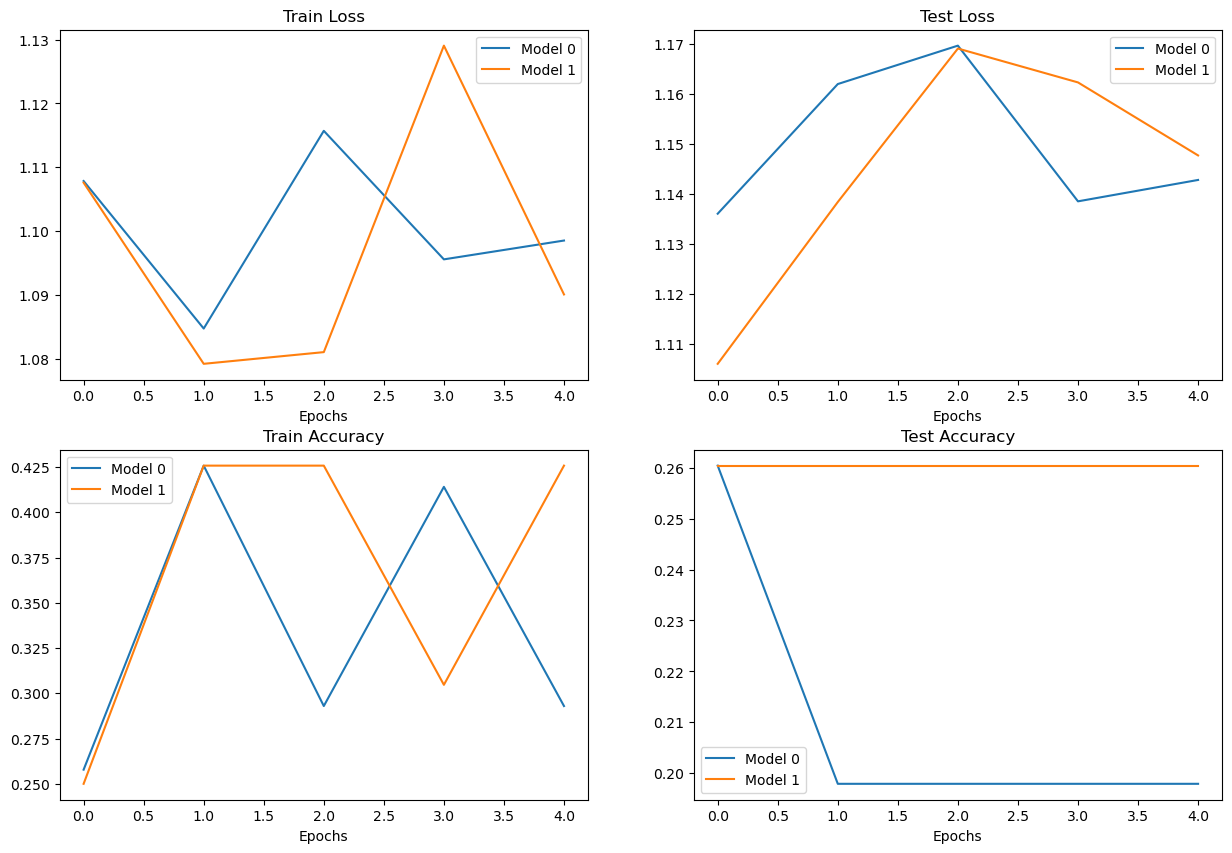

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

# 11.Make a prediction on a custom image

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "images.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/Junying123/branching/main/images.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

data\images.jpeg already exists, skipping download.


## 11.1 Loading in a custom image

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[157, 146, 135,  ...,   9,  24,  26],
         [155, 156, 154,  ...,  17,  20,  25],
         [148, 137, 137,  ...,  19,  21,  24],
         ...,
         [150, 160, 177,  ...,   7,   7,   5],
         [202, 178, 212,  ...,   1,   1,   3],
         [199, 175, 212,  ...,   1,   1,   3]],

        [[148, 139, 127,  ...,   2,  17,  19],
         [150, 151, 150,  ...,   9,  12,  17],
         [149, 138, 138,  ...,  10,  12,  15],
         ...,
         [129, 138, 150,  ...,   5,   5,   3],
         [187, 161, 190,  ...,   0,   0,   1],
         [188, 163, 191,  ...,   0,   0,   1]],

        [[143, 133, 125,  ...,   0,  11,  13],
         [147, 148, 149,  ...,   6,  10,  14],
         [151, 140, 142,  ...,  11,  15,  16],
         ...,
         [110, 117, 129,  ...,   6,   6,   4],
         [168, 141, 169,  ...,   0,   0,   2],
         [168, 141, 172,  ...,   0,   0,   2]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 202, 249])

Custom image dtype

## 11.2 Predicting on custom images with a trained PyTorch model


- Our custom image tensor is of type torch.uint8 with values ranging from 0 to 255
- The model requires image tensors of type torch.float32 with values between 0 and 1
- Prior to using our custom image with the model, we must convert it to the same format as the data the model is trained on

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6157, 0.5725, 0.5294,  ..., 0.0353, 0.0941, 0.1020],
         [0.6078, 0.6118, 0.6039,  ..., 0.0667, 0.0784, 0.0980],
         [0.5804, 0.5373, 0.5373,  ..., 0.0745, 0.0824, 0.0941],
         ...,
         [0.5882, 0.6275, 0.6941,  ..., 0.0275, 0.0275, 0.0196],
         [0.7922, 0.6980, 0.8314,  ..., 0.0039, 0.0039, 0.0118],
         [0.7804, 0.6863, 0.8314,  ..., 0.0039, 0.0039, 0.0118]],

        [[0.5804, 0.5451, 0.4980,  ..., 0.0078, 0.0667, 0.0745],
         [0.5882, 0.5922, 0.5882,  ..., 0.0353, 0.0471, 0.0667],
         [0.5843, 0.5412, 0.5412,  ..., 0.0392, 0.0471, 0.0588],
         ...,
         [0.5059, 0.5412, 0.5882,  ..., 0.0196, 0.0196, 0.0118],
         [0.7333, 0.6314, 0.7451,  ..., 0.0000, 0.0000, 0.0039],
         [0.7373, 0.6392, 0.7490,  ..., 0.0000, 0.0000, 0.0039]],

        [[0.5608, 0.5216, 0.4902,  ..., 0.0000, 0.0431, 0.0510],
         [0.5765, 0.5804, 0.5843,  ..., 0.0235, 0.0392, 0.0549],
         [0.5922, 0.5490, 0.5569,  ..

## 11.2 Predicting on custom converted images

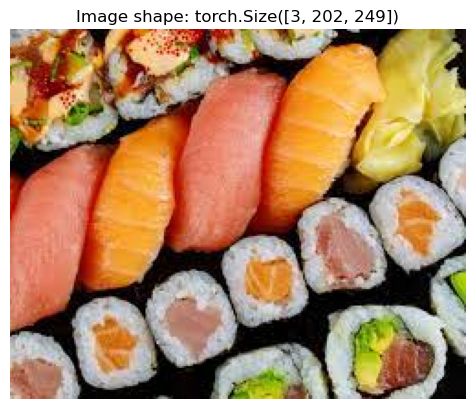

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

Original shape: torch.Size([3, 202, 249])
Transformed shape: torch.Size([3, 64, 64])


(-0.5, 63.5, 63.5, -0.5)

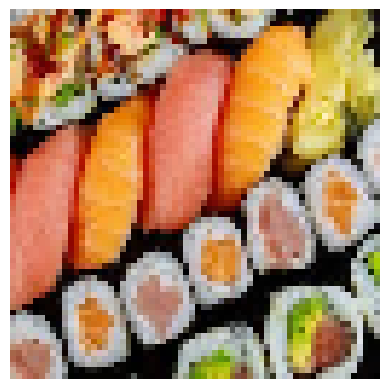

In [ ]:
# transform custom image
transformed_custom_image = transforms.Resize((64, 64))(custom_image)

#print out original and transformed image
print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {transformed_custom_image.shape}")

plt.imshow(transformed_custom_image.permute(1, 2, 0))
plt.axis(False)

- Shape error due to missing batch size dimension (NCHW where N is the batch size)
- Custom image converted to the same size as the model's training images
- Solution: Use torch.unsqueeze(dim=0) to add the batch size dimension and make a prediction on a single image

In [ ]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(transformed_custom_image.unsqueeze(dim=0).to(device))

print(f"Unsqueezed custom image shape: {transformed_custom_image.unsqueeze(dim=0).shape}")
print(f"Custom image transformed shape: {transformed_custom_image.shape}")

print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

## Find the predicted label
print(f"Predicted label: {class_names[custom_image_pred_label]}")

Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])
Custom image transformed shape: torch.Size([3, 64, 64])
Prediction logits: tensor([[ 0.1166,  0.0342, -0.1392]], device='cuda:0')
Prediction probabilities: tensor([[0.3710, 0.3417, 0.2873]], device='cuda:0')
Prediction label: tensor([0], device='cuda:0')
Predicted label: pizza


In [ ]:
# The values of the prediction probabilities are quite similar
custom_image_pred_probs

tensor([[0.3710, 0.3417, 0.2873]], device='cuda:0')

Similar prediction probabilities could indicate a few things:
1. The model may be attempting to predict all three classes simultaneously (such as an image containing pizza, steak, and sushi).
2. The model may lack a clear understanding of what it's trying to predict, resulting in similar values being assigned to each class.

As our model is not well-trained, it is essentially making predictions based on guesswork.


## 11.3 Function of custom image prediction

- Convert the target image to torch.float32 datatype and ensure that the pixel values are in the range [0, 1].
- If necessary, transform the target image.
- Ensure that the model is on the target device.
- Make a prediction on the target image using a trained model, ensuring that the image is the right size and on the same device as the model.
- Convert the model's output logits to prediction probabilities and then to prediction labels.
- Finally, plot the target image alongside the model prediction and prediction probability.

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """
    Predict the class (or classes) of an image and plot the image.
    Args:
        model: A PyTorch model
        image_path: Path to image
        class_names: A list of class names
        transform: An image transformation function
        device: A target device to send the data to
    Returns:
        None
    """
    # 1. Load in custom image and convert the tensor values to float32
    custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    custom_image = custom_image / 255.

    # 3. Transform the image
    if transform:
        custom_image = transform(custom_image).unsqueeze(dim=0)

    # 4. Send model to device
    model.to(device)

    # 5. Eval model and Predict model
    with torch.inference_mode():
        model_pred = model(custom_image.to(device))

    # 6. Convert logits -> pred probs
    pred_probs = torch.softmax(model_pred, dim=1)

    # 7. Convert pred probs -> pred label
    pred_label = torch.argmax(pred_probs, dim=1)

    # 8. Plot image with label (or pred)
    plt.imshow(custom_image.squeeze().permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
    if class_names:
        title = f"Pred: {class_names[pred_label]} | Prob: {pred_probs.max():.3f}"
    else:
        title = f"Pred: {pred_label} | Prob: {pred_probs.max():.3f}"
    plt.title(title)
    plt.axis(False)


C:\Users\User\anaconda3\envs\pytorch\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


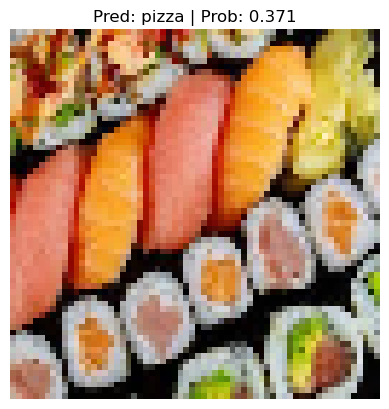

In [ ]:
# Predict on custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=transforms.Resize((64, 64)),
                    device=device)

**This model is not confident on predicting the class of the image**